In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import os

In [2]:
X = np.load('dataset.npy')
y = np.load('labels.npy')

In [3]:
X = X.reshape(X.shape[0], 28 * 28)

In [4]:
num_classes = len(np.unique(y))
y = to_categorical(y, num_classes)

In [6]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 0.4585 - loss: 10.4945 - val_accuracy: 0.7903 - val_loss: 0.7698
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 624us/step - accuracy: 0.7087 - loss: 1.0152 - val_accuracy: 0.8815 - val_loss: 0.4356
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 597us/step - accuracy: 0.7963 - loss: 0.7182 - val_accuracy: 0.8991 - val_loss: 0.3694
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 601us/step - accuracy: 0.8368 - loss: 0.5877 - val_accuracy: 0.9187 - val_loss: 0.3158
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 615us/step - accuracy: 0.8616 - loss: 0.5018 - val_accuracy: 0.9319 - val_loss: 0.2640
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 598us/step - accuracy: 0.8730 - loss: 0.4712 - val_accuracy: 0.9357 - val_loss: 0.2411
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 591us/step - accuracy: 0.8835 - loss: 0.4256 - val_accuracy: 0.9337 - val_loss: 0.2651
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 622us/step - accuracy: 0.8940 

In [8]:
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, color_mode='grayscale', target_size=(28, 28))
    img = image.img_to_array(img)
    img = img.astype('float32') / 255.0  
    img = img.reshape(1, 28 * 28)
    return img

In [9]:
images_folder = 'images/'

for img_file in os.listdir(images_folder):
    img_path = os.path.join(images_folder, img_file)
    img = load_and_preprocess_image(img_path)
   
    prediction = model.predict(img)
    predicted_digit = np.argmax(prediction, axis=1)
    
    print(f"Predicted digit for {img_file}: {predicted_digit[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted digit for im-5.png: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted digit for im-4.png: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Predicted digit for im-1.png: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Predicted digit for im-3.png: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted digit for im-2.png: 8


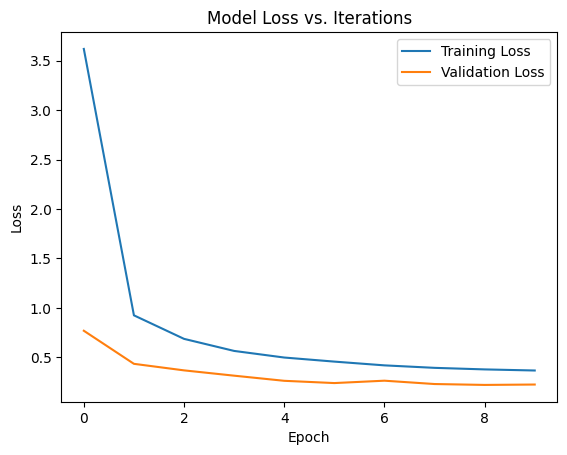

In [10]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Model Loss vs. Iterations')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()

plt.show()